# 1.ライブラリのインポート

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR  # SVRモデル
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error  # MAE評価
from sklearn.preprocessing import StandardScaler # 標準化用

# 2. データの読み込み（Excelファイル）

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/github/利益予測データベース.xlsx"
df = pd.read_excel(file_path)

df.head(6)  # データの先頭6行を表示

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sample,group,ni_t,ni_t1,ni_t2,ni_t3,ni_t4,ni_t5,cy_e_t1,cy_sale_t1,...,cy_iva_c_t1,cy_intan_c_t1,cy_ap_c_t1,cy_dlc_c_t1,cy_txp_c_t1,cy_dltt_c_t1,cy_re_c_t1,cy_cfo_c_t1,ni_t_mgt,afe_t_mgt
0,201003N0000001,1,0.053142,0.077657,0.073253,0.097867,0.098210,0.067920,0.077657,7.220336,...,-0.025984,0.009102,0.008368,0.135497,-0.011255,0.035526,0.051674,-0.339696,0.088080,0.034939
1,200903N0000001,1,0.083942,0.079182,0.105787,0.106157,0.073416,0.066011,0.079182,7.815907,...,-0.073469,0.002539,-0.052206,-0.333652,0.020470,-0.017614,0.044907,0.587329,0.079340,0.004602
2,200803N0000001,1,0.052085,0.069586,0.069830,0.048293,0.043422,0.039038,0.069586,5.465569,...,-0.083399,0.000139,-0.056052,0.133675,0.000974,-0.031488,0.049406,-0.105840,0.066107,0.014022
3,200703N0000001,1,0.060600,0.060812,0.042056,0.037814,0.033996,0.031088,0.060812,4.632824,...,0.105868,0.005575,0.039057,0.072174,-0.004606,-0.052934,0.043632,0.004212,0.075750,0.015150
4,200603N0000001,1,0.080197,0.055463,0.049869,0.044834,0.040998,0.037042,0.055463,6.099235,...,-0.012547,0.000679,0.018461,-0.114562,0.001758,0.075842,0.035723,-0.049469,0.083914,0.003716
5,200503N0000001,1,0.064146,0.057676,0.051853,0.047417,0.042841,0.015112,0.057676,7.003143,...,0.089149,0.001294,-0.010907,0.004483,-0.000092,-0.018440,0.005731,-0.113273,0.083187,0.019041


# 3. データ分割

In [ ]:
# 'df' (DataFrame) をNumPy配列に変換します
data = df.values

In [ ]:
# groupで分割

"""
# 3. データ分割（訓練データとテストデータの作成）
# group=1: 訓練用, group=2: テスト用
x_train = data[:, 8:66][data[:, 1] == 1]  # 特徴量（訓練用）
y_train = data[:, 2][data[:, 1] == 1]     # 目的変数（訓練用）
x_test  = data[:, 8:66][data[:, 1] == 2]  # 特徴量（テスト用）
y_test  = data[:, 2][data[:, 1] == 2]     # 目的変数（テスト用）

# データの形状を確認
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

"""

'\n# 3. データ分割（訓練データとテストデータの作成）\n# group=1: 訓練用, group=2: テスト用\nx_train = data[:, 8:66][data[:, 1] == 1]  # 特徴量（訓練用）\ny_train = data[:, 2][data[:, 1] == 1]     # 目的変数（訓練用）\nx_test  = data[:, 8:66][data[:, 1] == 2]  # 特徴量（テスト用）\ny_test  = data[:, 2][data[:, 1] == 2]     # 目的変数（テスト用）\n\n# データの形状を確認\nprint(x_train.shape, y_train.shape)\nprint(x_test.shape, y_test.shape)\n\n'

In [ ]:
# ランダムで分割
target = df.columns[2:3] # 取出所有列名（是一个 Index 对象）
features = df.columns[3:8]

print(target)
print(features)

X = df[features] # 用这些列名从 DataFrame 中选出列
y = df[target]

Index(['ni_t'], dtype='object')
Index(['ni_t1', 'ni_t2', 'ni_t3', 'ni_t4', 'ni_t5'], dtype='object')


In [ ]:
print("Xは↓")
print(X)
print("-"*80)
print("yは↓")
print(y)

Xは↓
          ni_t1     ni_t2     ni_t3     ni_t4     ni_t5
0      0.077657  0.073253  0.097867  0.098210  0.067920
1      0.079182  0.105787  0.106157  0.073416  0.066011
2      0.069586  0.069830  0.048293  0.043422  0.039038
3      0.060812  0.042056  0.037814  0.033996  0.031088
4      0.055463  0.049869  0.044834  0.040998  0.037042
...         ...       ...       ...       ...       ...
51014 -0.070314  0.011884  0.027729  0.051827  0.048856
51015  0.011375  0.026541  0.049606  0.046762  0.060981
51016  0.026731  0.049961  0.047097  0.061417  0.077646
51017  0.046526  0.043858  0.057194  0.072307  0.088013
51018  0.109087  0.088073  0.067059  0.054389  0.049444

[51019 rows x 5 columns]
--------------------------------------------------------------------------------
yは↓
           ni_t
0      0.053142
1      0.083942
2      0.052085
3      0.060600
4      0.080197
...         ...
51014 -0.064041
51015 -0.067300
51016  0.011456
51017  0.024893
51018  0.104142

[51019 rows x 1 colu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 標準化の適用

In [ ]:
# 特徴量と目的変数、それぞれスケーラー作成
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# 学習データを用いて fit + transform
X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel() # SVRは目的変数が一次元配列である必要があるため、ravel()で変換 (n, 1) → (n,)


# テストデータは transform のみ
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel() # SVRは目的変数が一次元配列である必要があるため、ravel()で変換 (n, 1) → (n,)

# 標準化後の形状確認
print("X_train_scaled:", X_train_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)


X_train_scaled: (35713, 5)
y_train_scaled: (35713,)
X_test_scaled: (15306, 5)
y_test_scaled: (15306,)


# SVR モデル パラメーター説明


In [ ]:
"""
sklearn.svm.SVR(
    kernel='rbf',        # 核函数
    degree=3,            # 多项式核函数的次数（仅对 kernel='poly' 有效）
    gamma='scale',       # 核函数系数（对 'rbf'、'poly' 和 'sigmoid' 有效）
    coef0=0.0,           # 核函数中的常数项（对 'poly' 和 'sigmoid' 有效）
    tol=1e-3,            # 停止训练的容差
    C=1.0,               # 惩罚参数
    epsilon=0.1,         # epsilon-SVR 中的 ε，允许的误差区间
    shrinking=True,      # 是否使用启发式收缩算法
    cache_size=200,      # 核函数计算的缓存大小（以 MB 为单位）
    verbose=False,       # 是否打印训练过程信息
    max_iter=-1          # 最大迭代次数（-1 表示无限制）
)
"""

"\nsklearn.svm.SVR(\n    kernel='rbf',        # 核函数\n    degree=3,            # 多项式核函数的次数（仅对 kernel='poly' 有效）\n    gamma='scale',       # 核函数系数（对 'rbf'、'poly' 和 'sigmoid' 有效）\n    coef0=0.0,           # 核函数中的常数项（对 'poly' 和 'sigmoid' 有效）\n    tol=1e-3,            # 停止训练的容差\n    C=1.0,               # 惩罚参数\n    epsilon=0.1,         # epsilon-SVR 中的 ε，允许的误差区间\n    shrinking=True,      # 是否使用启发式收缩算法\n    cache_size=200,      # 核函数计算的缓存大小（以 MB 为单位）\n    verbose=False,       # 是否打印训练过程信息\n    max_iter=-1          # 最大迭代次数（-1 表示无限制）\n)\n"

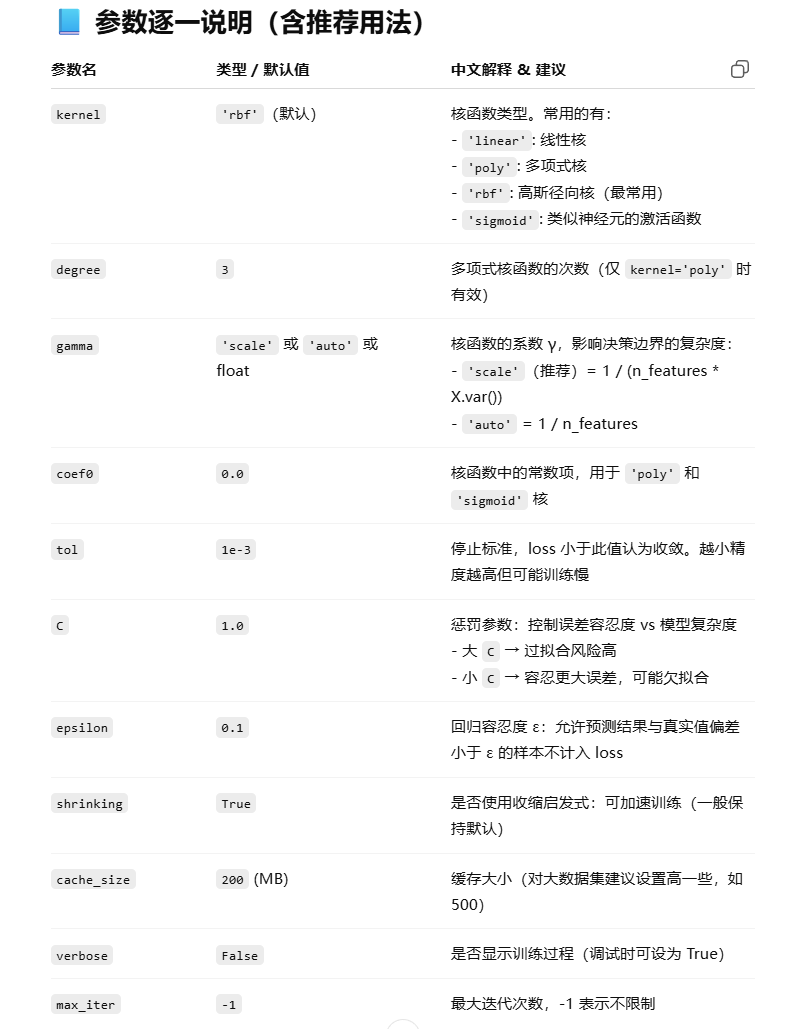

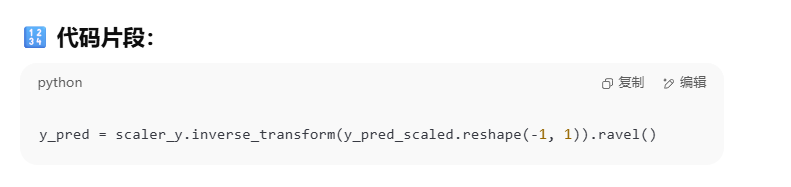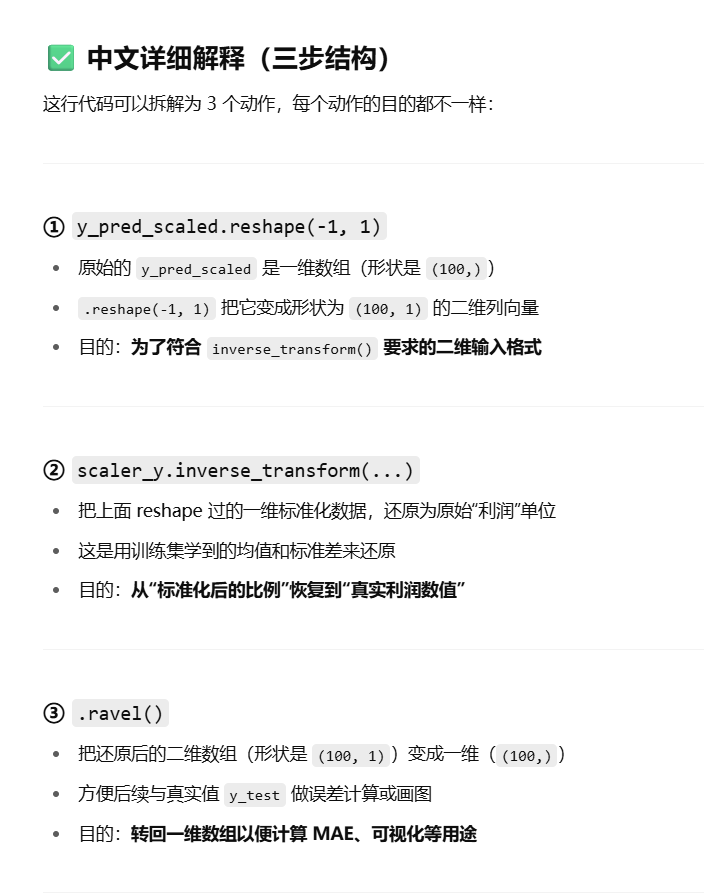

# 5. SVR モデルの学習と予測



```
# SVRモデルの定義
svr = SVR(
    kernel='rbf',         # カーネルの種類（'rbf': ガウスカーネル、よく使われる）
    C=1.0,             # 正則化パラメータ（大きいほど過学習のリスク）
    epsilon=0.1,          # 許容誤差（この範囲内の誤差は無視される）
    gamma='scale',         # カーネル係数（'scale'は自動計算、推奨）
    shrinking=True,         # 収縮ヒューリスティックを使用するか（通常はTrue）
    tol=1e-3,            # 収束の許容誤差（小さいほど精度高いが遅い）
    max_iter=-1,          # 最大イテレーション数（-1で制限なし）
    cache_size=200,         # キャッシュサイズ（MB単位、大規模データの場合は増やす）
    verbose=False          # 学習過程を表示するか（デバッグ用）
)

```



In [ ]:
# 評価の安定性を高めるため、3回繰り返して平均を取る
MAX_TRIALS = 3

mean_score = []  # 平均スコア（MAE）を保存するリスト
score = []  # 各試行のスコア（MAE）を保存するリスト

for trial in range(MAX_TRIALS):
    print(f"Trial {trial + 1}/{MAX_TRIALS}")

    # カーネル法（RBF）によるSVR
    svr = SVR(
    kernel='rbf',     # RBFカーネル（非線形回帰に適したカーネル関数）
    C=1.0,            # 正則化パラメータ（大きいほど過学習のリスクあり）
    epsilon=0.05,       # 許容誤差（±0.1以内の誤差は無視される）
    verbose=True
    )

    svr.fit(X_train_scaled, y_train_scaled)

    y_pred_scaled = svr.predict(X_test_scaled)  # 予測（標準化されたまま）

    # 予測結果を元のスケールに戻す
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # MAE（平均絶対誤差）で評価
    mae = mean_absolute_error(y_test, y_pred)
    score.append(mae)

# 3回の平均スコアを記録
mean_score.append(np.mean(score))

# 最終結果の表示
print(f"\nMAE（平均絶対誤差）: {mean_score[0]:.5f}")


Trial 1/3
[LibSVM]Trial 2/3
[LibSVM]Trial 3/3
[LibSVM]
MAE（平均絶対誤差）: 0.05847


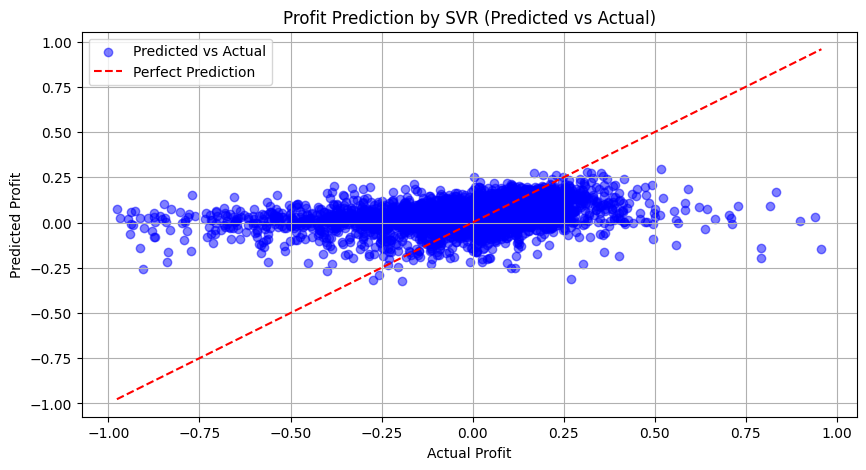

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size (10 inches wide, 5 inches tall)

# Plot scatter plot (x: actual values, y: predicted values)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot a reference line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Set axis labels and title
plt.xlabel("Actual Profit")       # X-axis label
plt.ylabel("Predicted Profit")    # Y-axis label
plt.title("Profit Prediction by SVR (Predicted vs Actual)")  # Title
plt.legend()                      # Show legend
plt.grid(True)                    # Show grid
plt.show()                        # Display the plot
